# Linear regression on Google Playstore data

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [227]:
data=pd.read_csv("D:\\fortray\\googleplaystore.csv")

In [228]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [229]:
data.dropna(how ='any', inplace = True)

In [230]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [231]:
data.drop(["App","Last Updated","Current Ver","Android Ver","Category"],axis=1,inplace=True)

In [232]:
data

,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,4.1,159,19M,"10,000+",Free,0,Everyone,Art_&_Design
1,3.9,967,14M,"500,000+",Free,0,Everyone,Art_&_Design_Pretend_Play
2,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art_&_Design
3,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art_&_Design
4,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art_&_Design_Creativity
...,...,...,...,...,...,...,...,...
10834,4.0,7,2.6M,500+,Free,0,Everyone,Education
10836,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,5.0,4,3.6M,100+,Free,0,Everyone,Education
10839,4.5,114,Varies with device,"1,000+",Free,0,Mature_17+,Books_&_Reference


In [233]:
data.dtypes

Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
dtype: object

In [234]:
data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [235]:
data['Size'] = data['Size'].str.replace('.', '').str.replace('M', '00').str.replace('k', '0')

In [236]:
data["Size"]

0                      1900
1                      1400
2                      8700
3                      2500
4                      2800
                ...        
10834                  2600
10836                  5300
10837                  3600
10839    Varies with device
10840                  1900
Name: Size, Length: 9360, dtype: object

In [237]:
data = data[data["Size"].str.contains("Varies with device") == False]

In [238]:
data["Size"]

0        1900
1        1400
2        8700
3        2500
4        2800
         ... 
10833    6190
10834    2600
10836    5300
10837    3600
10840    1900
Name: Size, Length: 7723, dtype: object

In [239]:
data.Size=data.Size.astype("int32")

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [240]:
data.dtypes

Rating            float64
Reviews            object
Size                int32
Installs           object
Type               object
Price              object
Content_Rating     object
Genres             object
dtype: object

In [241]:
data.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [242]:
data.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [243]:
data = pd.get_dummies(data, columns=['Type'])

In [244]:
data = pd.get_dummies(data, columns=['Content_Rating'])

In [245]:
data = pd.get_dummies(data, columns=['Genres'])

In [246]:
data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '').str.replace('Free', '0').astype(int)

In [247]:
data.dtypes

Rating                                          float64
Reviews                                          object
Size                                              int32
Installs                                          int32
Price                                            object
                                                 ...   
Genres_Video_Players_&_Editors                    uint8
Genres_Video_Players_&_Editors_Creativity         uint8
Genres_Video_Players_&_Editors_Music_&_Video      uint8
Genres_Weather                                    uint8
Genres_Word                                       uint8
Length: 125, dtype: object

In [248]:
data.Price.unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [249]:
data['Price'] = data['Price'].str.replace('$','')

In [250]:
data.Price.unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

In [251]:
data.Price=data.Price.astype("float")

In [252]:
data.dtypes

Rating                                          float64
Reviews                                          object
Size                                              int32
Installs                                          int32
Price                                           float64
                                                 ...   
Genres_Video_Players_&_Editors                    uint8
Genres_Video_Players_&_Editors_Creativity         uint8
Genres_Video_Players_&_Editors_Music_&_Video      uint8
Genres_Weather                                    uint8
Genres_Word                                       uint8
Length: 125, dtype: object

In [253]:
data.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [254]:
data.Reviews=data.Reviews.astype("int32")

In [255]:
data.dtypes

Rating                                          float64
Reviews                                           int32
Size                                              int32
Installs                                          int32
Price                                           float64
                                                 ...   
Genres_Video_Players_&_Editors                    uint8
Genres_Video_Players_&_Editors_Creativity         uint8
Genres_Video_Players_&_Editors_Music_&_Video      uint8
Genres_Weather                                    uint8
Genres_Word                                       uint8
Length: 125, dtype: object

In [256]:
data.isna().sum()

Rating                                          0
Reviews                                         0
Size                                            0
Installs                                        0
Price                                           0
                                               ..
Genres_Video_Players_&_Editors                  0
Genres_Video_Players_&_Editors_Creativity       0
Genres_Video_Players_&_Editors_Music_&_Video    0
Genres_Weather                                  0
Genres_Word                                     0
Length: 125, dtype: int64

In [257]:
#Checking the rating
data.Rating.describe()

count    7723.000000
mean        4.173935
std         0.544638
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [258]:
#the reviews must lie between 1-5, which is correct.

In [259]:
#Reviews should not be more than installs as only those who installed can review the app.
#Checking if reviews are more than installs. Counting total rows like this.

In [260]:
len(data[data.Reviews > data.Installs])

6

In [261]:
data= data[data.Reviews <= data.Installs].copy()

In [262]:
len(data[data.Reviews > data.Installs])

0

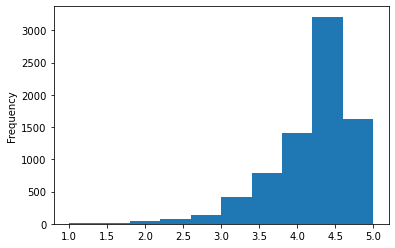

In [263]:
#Distributing the ratings
data.Rating.plot.hist()
#Show plot
plt.show()

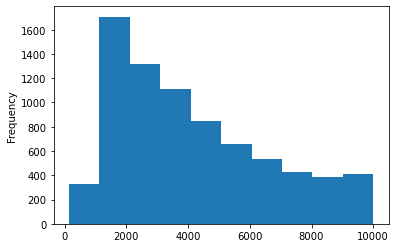

In [264]:
data['Size'].plot.hist()
#Show plot
plt.show()

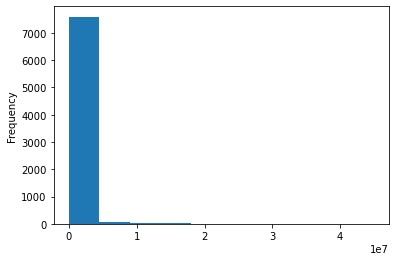

In [265]:
#Distributing the ratings
data.Reviews.plot.hist()
#Show plot
plt.show()

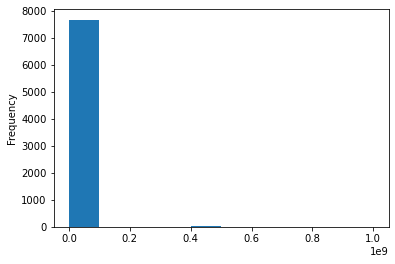

In [266]:
#Distributing the ratings
data.Installs.plot.hist()
#Show plot
plt.show()

In [267]:
#A price of $200 for an application on the Play Store is very high and suspicious. Check the records that have very high price: Is 200 a high price?

In [268]:
#Checking the records
len(data[data.Price > 200])

15

In [269]:
data[data.Price > 200]

,Rating,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Content_Rating_Adults_only_18+,Content_Rating_Everyone,Content_Rating_Everyone_10+,...,Genres_Strategy_Education,Genres_Tools,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
4197,4.3,6,1500,100,399.99,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4362,3.8,718,2600,10000,399.99,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4367,3.6,275,7300,10000,400.00,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5351,3.8,3547,1800,100000,399.99,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5354,4.0,856,8700,10000,399.99,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5355,3.8,411,2600,10000,299.99,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5356,4.1,1867,4700,50000,399.99,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5357,2.9,41,2900,1000,379.99,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5358,3.8,93,2200,1000,399.99,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5359,3.5,472,9650,5000,399.99,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
data = data[data.Price <= 200].copy()

In [271]:
#Dropping the apps with more than 100M installs
len(data[data.Installs >= 1000000000])

10

In [272]:
data = data[data.Installs < 1000000000].copy()

In [273]:
#Dropping the records with more than 2 million reviews
data = data[data.Reviews <= 2000000]


In [274]:
data.Installs = data.Installs.apply(np.log1p)

In [275]:
data.Reviews = data.Reviews.apply(np.log1p)

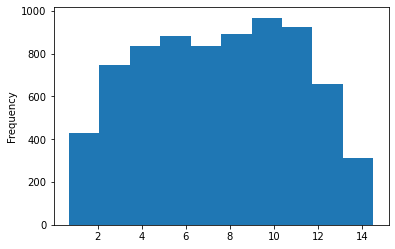

In [276]:
#Distributing the ratings
data.Reviews.plot.hist()
#Show plot
plt.show()

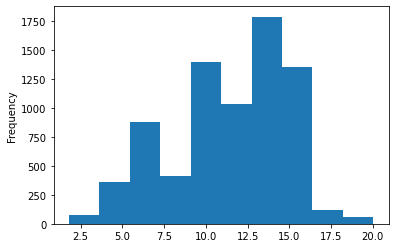

In [277]:
#Distributing the ratings
data.Installs.plot.hist()
#Show plot
plt.show()

In [278]:
from sklearn.model_selection import train_test_split

In [279]:
df_train, df_test = train_test_split(data, train_size = 0.7, random_state = 100)

In [280]:
df_train.shape, df_test.shape

((5235, 125), (2244, 125))

In [281]:
y_train = df_train.pop("Rating")
X_train = df_train

In [210]:
X_train.head(1)

,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Content_Rating_Adults_only_18+,Content_Rating_Everyone,Content_Rating_Everyone_10+,Content_Rating_Mature_17+,...,Genres_Strategy_Education,Genres_Tools,Genres_Travel_&_Local,Genres_Travel_&_Local_Action_&_Adventure,Genres_Trivia,Genres_Video_Players_&_Editors,Genres_Video_Players_&_Editors_Creativity,Genres_Video_Players_&_Editors_Music_&_Video,Genres_Weather,Genres_Word
1217,8.780787,1800,13.815512,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
y_test = df_test.pop("Rating")
X_test = df_test

In [212]:
#Importing the statsmodel library
import statsmodels.api as sm

In [213]:
#Applying linear regression
model1 = sm.OLS(y_train, X_train)

In [214]:
model1 = model1.fit()

In [215]:
#Finding the summary
model1.summary()

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     8.148
Date:                Thu, 12 Jan 2023   Prob (F-statistic):          1.21e-112
Time:                        14:14:08   Log-Likelihood:                -3910.4
No. Observations:                5235   AIC:                             8045.
Df Residuals:                    5123   BIC:                             8780.
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Reviews                                          0.1749      0.007     24.345      0.000       0.161       0.189
Size                                         -2.058e-06      3e-06     -0.687      0.492   -7.93e-06    3.82e-06
Installs                                        -0.1533      0.007    -21.417      0.000      -0.167      -0.139
Price                                            0.0021      0.004      0.507      0.612      -0.006       0.010
Type_Free                                        3.5032      0.098     35.770      0.000       3.311       3.695
Type_Paid                                        3.4184      0.099     34.523      0.000       3.224       3.613
Content_Rating_Adults_only_18+                   1.2830      0.458      2.804      0.005       0.386       2.180
Content_Rating_Everyone                          1.1253      0.093     12.075      0.000       0.943       1.308
Content_Rating_Everyone_10+                      1.0960      0.099     11.018      0.000       0.901       1.291
Content_Rating_Mature_17+                        1.1323      0.100     11.310      0.000       0.936       1.329
Content_Rating_Teen                              1.1459      0.095     12.034      0.000       0.959       1.333
Content_Rating_Unrated                           1.1393      0.457      2.494      0.013       0.244       2.035
Genres_Action                                   -0.0641      0.047     -1.350      0.177      -0.157       0.029
Genres_Action_Action_&_Adventure                 0.1030      0.164      0.627      0.531      -0.219       0.425
Genres_Adventure                                -0.0949      0.078     -1.218      0.223      -0.248       0.058
Genres_Adventure_Action_&_Adventure              0.0264      0.363      0.073      0.942      -0.686       0.738
Genres_Adventure_Brain_Games                     0.2790      0.513      0.544      0.586      -0.726       1.284
Genres_Adventure_Education                   -1.577e-12   8.49e-12     -0.186      0.853   -1.82e-11    1.51e-11
Genres_Arcade                                    0.0261      0.055      0.472      0.637      -0.082       0.135
Genres_Arcade_Action_&_Adventure                 0.0875      0.164      0.534      0.593      -0.234       0.409
Genres_Arcade_Pretend_Play                   -3.338e-12   5.99e-12     -0.557      0.578   -1.51e-11    8.41e-12
Genres_Art_&_Design                              0.3202      0.086      3.719      0.000       0.151       0.489
Genres_Art_&_Design_Creativity                   0.3094      0.210      1.470      0.142      -0.103       0.722
Genres_Art_&_Design_Pretend_Play             -3.552e-12   5.63e-12     -0.631      0.528   -1.46e-11    7.49e-12
Genres_Auto_&_Vehicles          

In [220]:
#Prediction and evaluation
import sklearn.metrics as metrics
y_test_pred= model1.predict(X_test)

In [221]:
#Assessing the model using RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

0.50196233845831


In [224]:
#Calculating MPE
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100
print ('MPE: ' + str(MPE(y_test_pred,y_test)) )

MPE: -2.2201442049822195


In [225]:
#Calculating MAPE
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAPE: 10.04303224685645
